<a href="https://colab.research.google.com/github/Matceo/SyS./blob/main/Serie%26TransformadaDeFourier./S%26S%3AParcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Ejercicio1

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,IntSlider

ti=-np.pi #Tiempo inicial
tf=np.pi #Tiempo final
wo=2*np.pi/(tf-ti) #Frecuencia angular
Fo=wo/2*np.pi #Frecuencia fundamental
print('wo=', wo)
print('Fo=', Fo)
Fs=10*Fo #Frecuencia muestreo -> debe respetar Nyquist: Fs>=2Fo
tv=np.arange(ti, tf, 1/Fs) #Vector de tiempo
x=abs(6*np.sin(3*tv+(np.pi/4)))**2 #Señal de entrada
plt.plot(tv, x) #Gráfica de la señal
plt.xlabel('Tiempo [s]')
plt.ylabel('$x(t)$')
plt.show()

In [ ]:
#Se crean las bases de la Serie Exponencial Compleja de Fourier.
T=tf-ti #Intervalo de interés
N=20 #Número armonicos a simular
wo=2*np.pi/T #Frecuencia fundamental
#Definimos las bases:
phin=np.zeros((len(tv), 2*N+1), dtype=np.complex_) #Crear matriz para guardar bases
for n in range(-N, N+1, 1):
    phin[:, n+N]=np.exp(1j*n*wo*tv) #Base Exponencial Compleja de Fourier en el intérvalo de interés.
#Para graficar las bases:
def pltbase(n=1):
    plt.plot(tv, np.real(phin[:, int(n+N)]), label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]", fontsize = 14)
    plt.ylabel("$\phi_n$(t)", fontsize= 14)
    plt.plot(tv, np.imag(phin[:, int(n+N)]), label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase, n=(-N,N,1))
plt.show()

In [ ]:
#Calcular el espectro y cambiar según la señal estudiada:
cn=np.zeros(2*N+1, dtype=np.complex_)
nv=np.linspace(-N, N, 2*N+1) #Vector de armónicos
cn[N]=18 #Nivel DC de C0
cn[N-6]=9j #Armónico -6
cn[N+6]=-9j #Armónico 6
#Graficar espectro:
fig=plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.stem(nv, np.real(cn), 'r') #Gráfica de la parte real del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$Re\{C_n\}$', fontsize=14)
plt.axis('tight')
plt.grid()
plt.subplot(2, 2, 2)
plt.stem(nv, np.imag(cn), 'r') #Grafica de la parte imaginaria del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$Im\{C_n\}$', fontsize=14)
plt.axis('tight')
plt.grid()
plt.subplot(2, 2, 3)
plt.stem(nv, abs(cn), 'r') #Magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$|C_n|$', fontsize=14)
plt.axis('tight')
plt.grid()
plt.subplot(2, 2, 4)
plt.stem(nv, np.angle(cn), 'r') #Fase del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$\langle C_n$', fontsize=14)
plt.axis('tight')
plt.grid()
fig.tight_layout()
plt.show()

In [ ]:
Px=486 #Potencia de la señal x(t)
def pltest(Na=1):
    ind=range(N-Na, N+Na+1)
    er=1-np.sum(abs(cn[ind])**2)/Px
#Señal reconstruida:
    xe=phin[:, ind].dot(cn[ind]) #dot calcula el producto punto entre vectores
    plt.plot(tv, xe, color='b', label='$x_e(t)$') #Señal estimada o filtrada
    plt.plot(tv, x, color='r', label='$x(t)$') #Señal original
    plt.title('ER=%.2f[%%]'%(100*er), fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest, Na=(1, N, 1))
plt.show()

In [ ]:
#Ejercicio2

#Simulación con canción de YouTube:
import soundfile as sf #Instalar pip install soundfile
from IPython.display import Audio #Librería para reproducir audio
#Instalar api youtube-dl:
!pip install youtube-dl
#Descargar canción de interés:
link="https://music.youtube.com/watch?v=H583WMbvSH4"
!youtube-dl --extract-audio -o "audio.%(mp3)s" --audio-format mp3 {link}

In [ ]:
#Convertir a .wav con ffmpeg para extraer audio en python:
!ffmpeg -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
#Instalar soundfile para cargar .wav:
!pip install soundfile

In [ ]:
#Leer archivo .wav:
nombre_out="output.wav"
xa, fs=sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de Muestreo %.2f[Hz]\naudio %s' % (fs, nombre_out))

Frecuencia de Muestreo 48000.00[Hz]
audio output.wav


In [ ]:
xpro=xa.copy() #Copiar archivos para procesar
#Leer cinco segundos de la canción:
ti=20 #Tiempo incio a procesar
tf=25 #Tiempo final a procesar
m=xpro[int(ti*fs):int((tf*fs)), 0] #Señal mensaje en primer canal
#Repoducir fragmento original de la señal mensaje:
Audio(m, rate=fs)

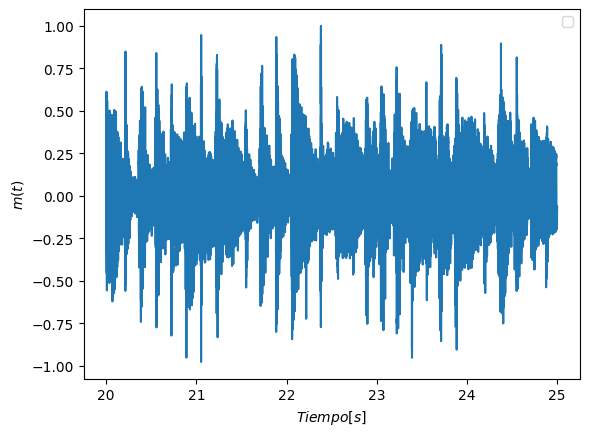

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Señal mensaje en tiempo y frecuencia
tt=np.arange(ti, tf, 1/fs) #Vector de tiempo
plt.plot(tt, m) #Graficar la señal de mensaje en el tiempo
plt.xlabel('$Tiempo [s]$')
plt.ylabel('$m(t)$')
plt.legend()
plt.show()

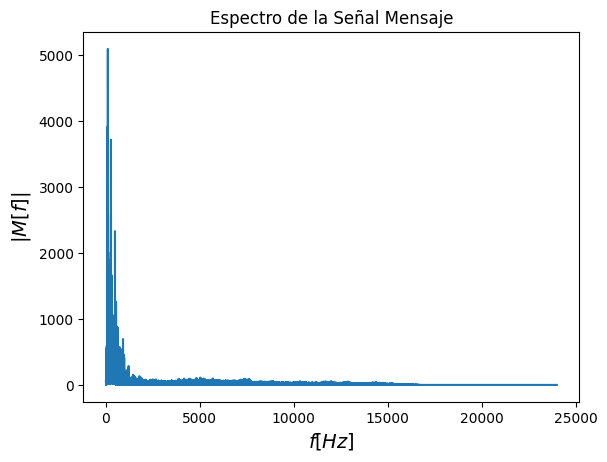

In [ ]:
#Fourier a la señal de mensaje:
Mw=np.fft.rfft(m) #Axis=0 permite aplicar fft por cada columna de xpro
vf=np.fft.rfftfreq(m.shape[0], 1/fs) #Se crea el vector de frecuencias
plt.plot(vf, abs(Mw)) #Se grafica la magnitud
plt.title(r'Espectro de la Señal Mensaje')
plt.xlabel(r'$f[Hz]$', fontsize=14)
plt.ylabel(r'$|M[f]|$', fontsize=14)
plt.show()

In [ ]:
Fc=15000 #Frecuencia de la señal portadora
Im=1 #Im=peak(m(t))/Ac -> Ac=peak(m(t))/Im
Ac=max(abs(m))/Im #Amplitud de la portadora según índice de modulación
c=Ac*np.cos(2*np.pi*Fc*tt) #Señal portadora
#Repoducir la señal portadora:
Audio(c,rate=fs)

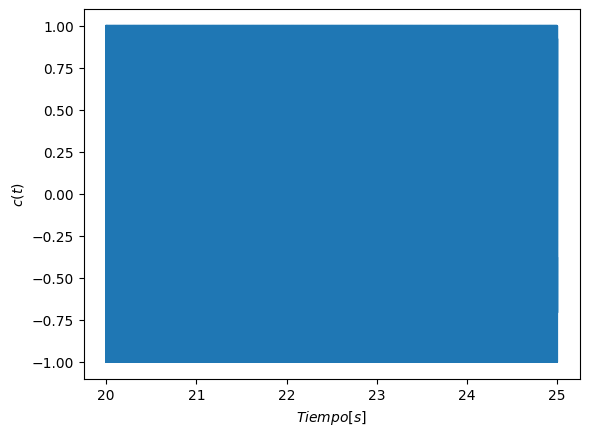

In [ ]:
#Señal portadora en tiempo y frecuencia:
plt.plot(tt, c) #Graficar la señal de mensaje en el tiempo
plt.xlabel('$Tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

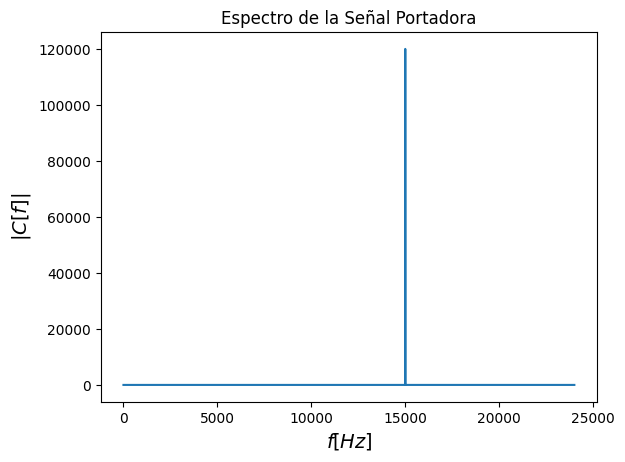

In [ ]:
#Fourier a la señal portadora:
Cw=np.fft.rfft(c) #Axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf, abs(Cw)) #Se grafica la magnitud
plt.title(r'Espectro de la Señal Portadora')
plt.xlabel(r'$f[Hz]$', fontsize=14)
plt.ylabel(r'$|C[f]|$', fontsize=14)
plt.show()

In [ ]:
#Señal modulada:
y=(1+m/Ac)*c #Señal modulada en AM
#Repoducir modulada
Audio(y, rate=fs)

In [ ]:
plt.plot(tt, y) #Graficar la señal de mensaje en el tiempo
plt.xlabel('$Tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

In [ ]:
#Fourier a la señal modulada:
Yw=np.fft.rfft(y) #Axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf, abs(Yw)) #Se grafica la magnitud
plt.title(r'Espectro de la Señal Modulada')
plt.xlabel(r'$f[Hz]$', fontsize=14)
plt.ylabel(r'$|Y[f]|$', fontsize=14)
plt.show()

In [ ]:
#Ejercicio3

import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split
import pandas as pd

warnings.filterwarnings('ignore')

#Data downloaded for Google Drive:
FILEID="1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

In [ ]:
#Cargar datos:
path_='CaractCE.mat' #Case Western Database
dicX=sio.loadmat(path_)
#Mostrar las claves disponibles en el diccionario:

import scipy.io as sio

#Cargar los datos desde el archivo .mat:
path_='CaractCE.mat'
dicX=sio.loadmat(path_)
#Iterar a través de todas las claves y mostrarlas una por una:
for key in dicX:
    print(key)
#Iterar a través de las claves en el diccionario y mostrar los datos asociados a cada clave:
for key, value in dicX.items():
    print(f'Base de Datos: {key}')
    print(value)
    print('\n')

In [ ]:
Xt=dicX['F']
print(Xt.shape)

In [ ]:
Xt=dicX['F'] #Datos en el tiempo
Fs=12000 #Frecuencia de muestreo
Tl=Xt.shape[1]/Fs #Tamaño del segmento
print('X(t) shape:', Xt.shape)
print('Tiempo [s]', Tl)
Y=dicX['E']
Ytrue=Y[:,2] #Clases de fallos en los rodamientos
labels_ = ['NOR', 'IR1_0.007´´', 'IR1_0.014´´', 'IR1_0.021´´',
           'IR2_0.007´´', 'IR2_0.014´´', 'IR2_0.021´´',
           'BE_0.007´´', 'BE_0.014´´', 'BE_0.021´´'
           ] #Nombres de las clases

In [ ]:
print(Ytrue.shape) #Etique membresia de los datos, diez posibles valores
print(np.unique(Ytrue))

In [ ]:
#Partir datos para train y test:
Xtrain, Xtest, Ytrain, _=train_test_split(Xt, Ytrue, test_size=0.3)
print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape}, Xtest shape {Xtest.shape}")

In [ ]:
#Calcular el espectro de Fourier a Xtrain:
vf=np.fft.rfftfreq(Xtrain.shape[1], 1/Fs) #Freq vector
Xw=(abs(np.fft.rfft(Xtrain))) #FFT
Xw.shape

In [ ]:
#Graficar espectro para clases representativas:
sca_=MinMaxScaler()
Xw_=sca_.fit_transform(Xw.T).T
#red=TSNE(perplexity=15, n_components=2, random_state=123, learning_rate='auto', init='pca')
red=PCA(n_components=2)
Z=red.fit_transform(Xw_)
plt.scatter(Z[:, 0],Z[:, 1], c=Ytrain, label='Xtrain')
plt.colorbar()
plt.show()

In [ ]:
#Supongamos que quieres promediar las filas de Xw para obtener un espectro promedio:
spectrum=np.mean(Xw, axis=0)
plt.figure(figsize=(10, 6))
plt.plot(vf, spectrum)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de Fourier Promediado')
plt.grid(True)
plt.show()

In [ ]:
#Función para calcular la señal promedio para cada clase:
def calcular_señal_promedio(X, Y):
    clases=np.unique(Y)
    señales_promedio_tiempo=[]
    señales_promedio_frecuencia=[]
    for clase in clases:
        #Seleccionar las muestras de la clase actual:
        muestras_clase=X[Y==clase]
        #Calcular la señal promedio en el dominio del tiempo:
        señal_promedio_tiempo=np.mean(muestras_clase, axis=0)
        señales_promedio_tiempo.append(señal_promedio_tiempo)
        #Calcular la FFT de la señal promedio:
        señal_promedio_fft=np.abs(np.fft.rfft(señal_promedio_tiempo))
        señales_promedio_frecuencia.append(señal_promedio_fft)
    return clases, señales_promedio_tiempo, señales_promedio_frecuencia
clases, señales_promedio_tiempo, señales_promedio_frecuencia=calcular_señal_promedio(Xtrain, Ytrain)
#Graficar señales promedio en el dominio del tiempo:
plt.figure(figsize=(12, 6))
for i, clase in enumerate(clases):
    plt.plot(señales_promedio_tiempo[i], label=f'Clase {clase}')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal Promedio en el Dominio del Tiempo')
plt.legend()
plt.show()
#Graficar señales promedio en el dominio de la frecuencia:
plt.figure(figsize=(12, 6))
for i, clase in enumerate(clases):
    plt.plot(señales_promedio_frecuencia[i], label=f'Clase {clase}')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.title('Señal Promedio en el Dominio de la Frecuencia')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#Entrenar un clasificador SVM:
clf=SVC(kernel='linear')
clf.fit(Xtrain, Ytrain)
#Realizar predicciones en el conjunto de prueba (Xtest):
Ypred=clf.predict(Xtest)
#Calcular la precisión de las predicciones:
accuracy=accuracy_score(_, Ypred)
print(f"Precisión del detector de fallos: {accuracy * 100:.2f}%")

In [ ]:
#Realizar predicciones en el conjunto de prueba (Xtest):
Ypred=clf.predict(Xtest)
#Mapeo de etiquetas a nombres de clases:
etiquetas_clases=['NOR', 'IR1_0.007', 'IR1_0.014', 'IR1_0.021', 'IR2_0.007', 'IR2_0.014', 'IR2_0.021', 'BE_0.007', 'BE_0.014', 'BE_0.021']
#Mostrar los tipos de fallos detectados en Xtest:
print("Tipos de fallos detectados en Xtest:")
for i in range(len(Ypred)):
    if Ypred[i]>=0 and Ypred[i]<len(etiquetas_clases):
        clase_predicha=etiquetas_clases[Ypred[i]]
        print(f"Muestra {i + 1}: {clase_predicha}")
    else:
        print(f"Muestra {i + 1}: Clase fuera de rango")